In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import SGD
import seaborn as sns

In [36]:
dataset = pd.read_csv("/content/drive/MyDrive/RansomwareProject/Datasets/transformed_train_df.csv")
print("Original dataset size: ",dataset.shape)

percent_data_set = 10

dataset['Label'], uniques = pd.factorize(dataset['Label'])
# print(dataset.head())
sampled_df = dataset.groupby('Label').apply(lambda x: x.sample(frac=percent_data_set/100, random_state=42)).reset_index(drop=True)
print("Sampled dataset size: ",sampled_df.shape)

print(f"Number of unique values in the 'Label' column: {dataset['Label'].nunique()}")

Original dataset size:  (313627, 21)
Sampled dataset size:  (31362, 21)
Number of unique values in the 'Label' column: 11


<ipython-input-36-1b72eacaa21d>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = dataset.groupby('Label').apply(lambda x: x.sample(frac=percent_data_set/100, random_state=42)).reset_index(drop=True)


In [37]:
# split the dataset
X_train = sampled_df.iloc[:,:20]
Y_train = sampled_df["Label"]
print("Sampled X size: ",X_train.shape)
print("Sampled Y size: ",Y_train.shape)

print("Sampled X head: ",X_train.head())
print("Sampled Y head: ",Y_train.head())

print("Classwise no of rows: ", Y_train.value_counts())

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

Sampled X size:  (31362, 20)
Sampled Y size:  (31362,)
Sampled X head:     FAMD_Component_1  FAMD_Component_2  FAMD_Component_3  FAMD_Component_4  \
0          1.106166         -1.091306          7.027377          4.311347   
1          0.954526         -1.033375         -0.491732         -1.109583   
2          0.643954         -1.227613         -5.401073         -3.618718   
3          1.094598         -1.110412         -1.769525         -2.175249   
4          1.108363         -1.127580         -1.382770         -1.992035   

   FAMD_Component_5  FAMD_Component_6  FAMD_Component_7  FAMD_Component_8  \
0         -1.536011          5.063335          1.261412         -6.509035   
1         -0.145088         -2.437912         -1.213178         -0.716131   
2         -5.784012          4.060536          1.793040          0.950605   
3         -2.229234         -2.066392         -1.881398         -1.683342   
4         -2.401953         -1.963375         -2.065242         -1.428270   

  

In [61]:
# lets make our NN model layers
np.random.seed(42)
tf.random.set_seed(42)
num_samples = 15000
num_features = 20
num_classes = 11
noOfEpochs=50
learningRate = 0.4

model = Sequential([
    Dense(512, activation='tanh', input_shape=(num_features,),kernel_initializer=HeNormal()),  # Input Layer
    Dense(256, activation='leaky_relu',kernel_initializer=HeNormal()),
    Dense(num_classes, activation='softmax')  # Output Layer
])

optimizer = SGD(learning_rate=learningRate)

model.compile(
    optimizer=optimizer,  # Adaptive Moment Estimation optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Tracking accuracy during training
)

model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                     │ (None, 512)                 │          10,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,907 (566.04 KB)

 Trainable params: 144,907 (566.04 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Training the model
reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
history = model.fit(
    X_train, Y_train,
    epochs=noOfEpochs,  # Number of training epochs
    batch_size=32,  # Mini-batch size
    verbose=1,  # Display training progress
    callbacks=[reduce_lr]
)



Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1329 - loss: 2.5279 - learning_rate: 0.4000
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1495 - loss: 2.2885 - learning_rate: 0.4000
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1536 - loss: 2.2770 - learning_rate: 0.4000
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1560 - loss: 2.2702 - learning_rate: 0.4000
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1593 - loss: 2.2639 - learning_rate: 0.4000
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1613 - loss: 2.2586 - learning_rate: 0.4000
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1601 - loss: 2.2561 - learning_rate: 0.4000
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1633 - loss: 2.2541 - learning_rate: 0.4000
Epoch 9/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1636 - loss: 2.2496 - learning_rate: 0.4000
Epoch 10/5

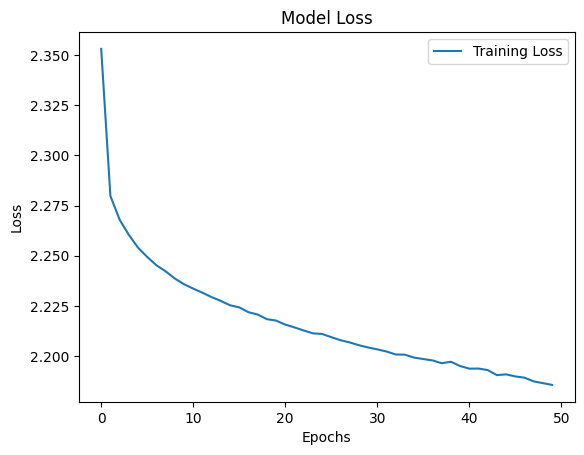

In [63]:
# Plot loss

plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

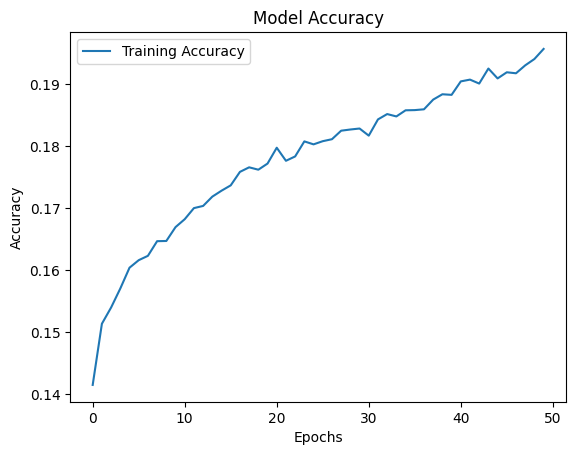

In [64]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save the entire model
model.save('/content/drive/MyDrive/RansomwareProject/models/100_20_L.h5')  # Save as HDF5 file


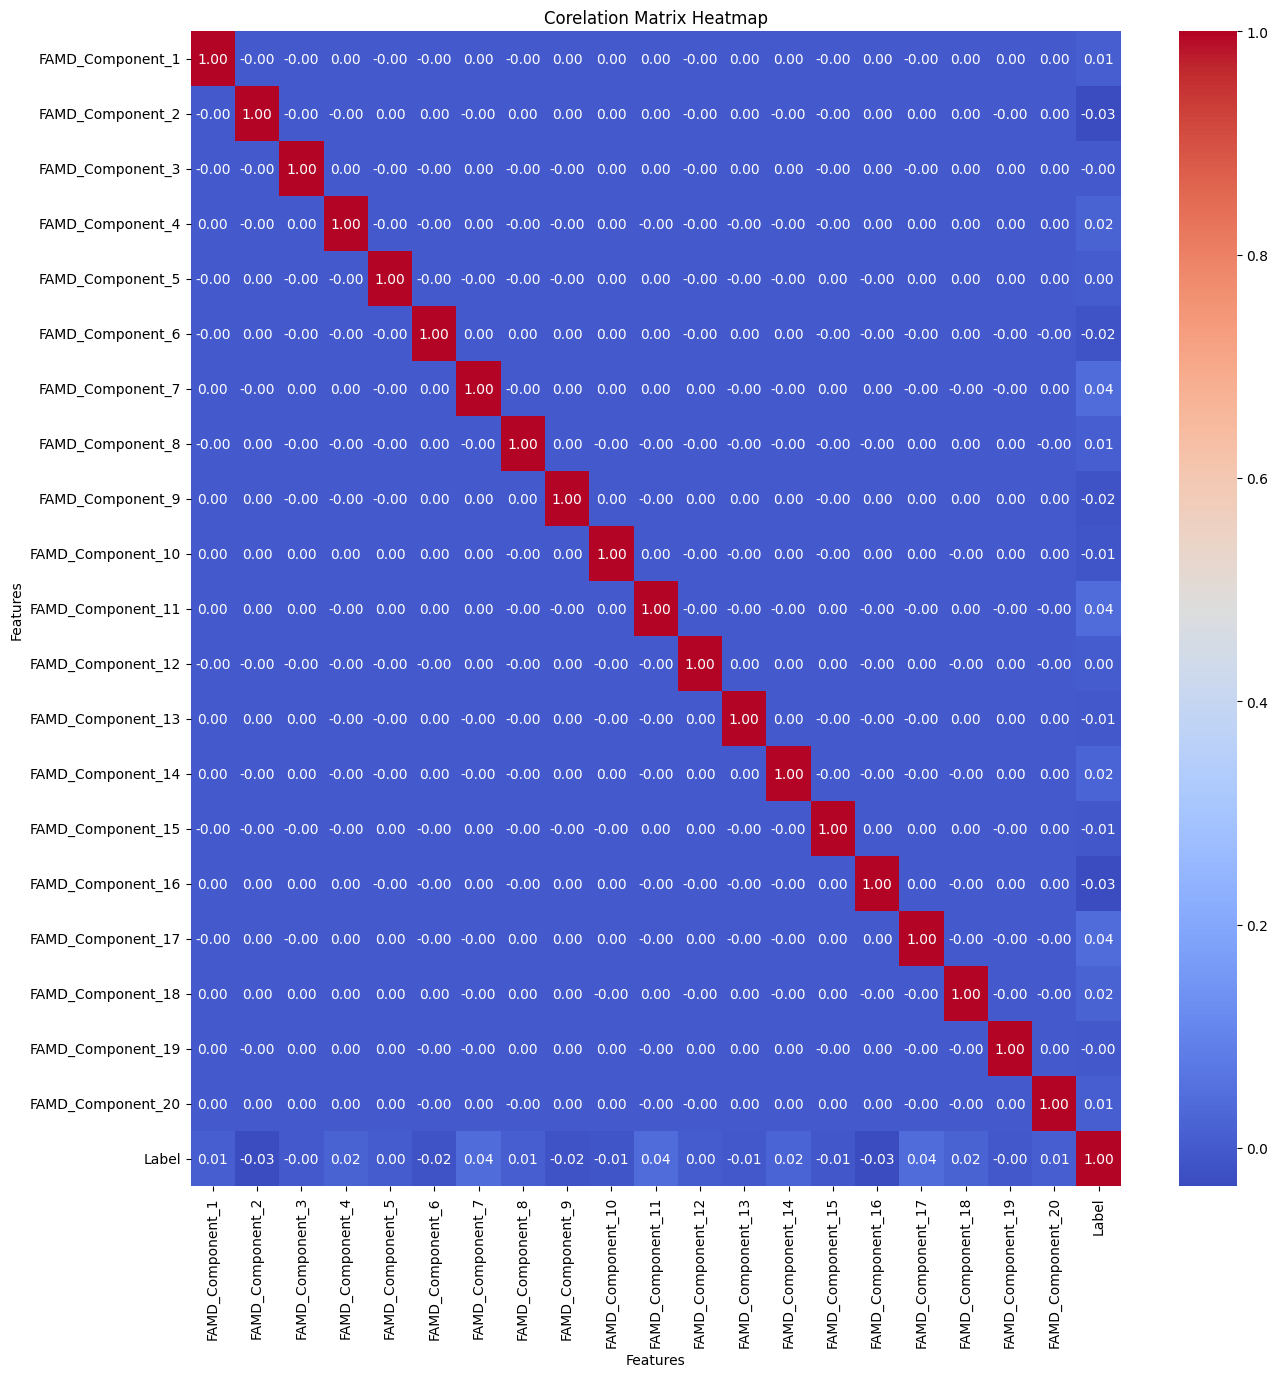

In [34]:
cov_matrix = dataset.corr()
# Plotting the covariance matrix using Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Corelation Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [35]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, Y_train)
for i, score in enumerate(mi):
    print(f"Feature {i}: {score}")

Feature 0: 0.16142366132909203
Feature 1: 0.21673861288198992
Feature 2: 0.21416217126978143
Feature 3: 0.1955907657062803
Feature 4: 0.18415685701925089
Feature 5: 0.19476316013027528
Feature 6: 0.1631349104708728
Feature 7: 0.17441210726266076
Feature 8: 0.17219153477737148
Feature 9: 0.1738406241380468
Feature 10: 0.15128515454341196
Feature 11: 0.16800935430274766
Feature 12: 0.14723888801516338
Feature 13: 0.14916446103426573
Feature 14: 0.1461496727780851
Feature 15: 0.15935297697492423
Feature 16: 0.14942970080174467
Feature 17: 0.1509346160053946
Feature 18: 0.1474919467895619
Feature 19: 0.1538670742034851
